In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
atl = "../AQI CSV Files_raw_data/hotlanta.csv"
atl = pd.read_csv(atl, delimiter=", ")

C:\Users\a_mcr\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [36]:
# Check for null values in atlanta pm25 dataframe
# atl.isnull().sum() # atl.info()

# drop 83 rows with null values found in pm25, remove columns with data we do not need
atl_no_nulls = atl.dropna(subset=["pm25"])
atl_rename = atl_no_nulls.rename(columns={"date":"Date","pm25":"PM2.5"})
atl_clean = atl_rename.drop(columns=["pm10","o3","no2", "so2","co"])
atl_clean

,Date,PM2.5
0,2020/7/2,29.0
1,2020/7/3,34.0
2,2020/7/4,51.0
3,2020/7/5,72.0
4,2020/7/6,82.0
...,...,...
2246,2014/3/28,59.0
2247,2014/3/29,30.0
2248,2014/3/30,9.0
2249,2014/3/31,29.0


In [37]:
# Cast the date into separate columns so the data can be sorted, drop Date column 
atl_clean[["Year","Month","Day"]] = atl_clean.loc[:,"Date"].str.split("/", n = 2, expand = True) 
atl_clean.drop(columns =["Date"], inplace = True) 
atl_drop = atl_clean
atl_drop

,PM2.5,Year,Month,Day
0,29.0,2020,7,2
1,34.0,2020,7,3
2,51.0,2020,7,4
3,72.0,2020,7,5
4,82.0,2020,7,6
...,...,...,...,...
2246,59.0,2014,3,28
2247,30.0,2014,3,29
2248,9.0,2014,3,30
2249,29.0,2014,3,31


In [38]:
atl_drop["Year"] = atl_drop["Year"].astype(int)
atl_drop["Month"] = atl_drop["Month"].astype(int)
# miami_clean = miami_clean[miami_clean["Year"]>2017]
atl_drop = atl_drop[atl_drop["Month"]<8]
# miami_clean.groupby("Year").count()
atl_cleaner = atl_drop
atl_cleaner

,PM2.5,Year,Month,Day
0,29.0,2020,7,2
1,34.0,2020,7,3
2,51.0,2020,7,4
3,72.0,2020,7,5
4,82.0,2020,7,6
...,...,...,...,...
2246,59.0,2014,3,28
2247,30.0,2014,3,29
2248,9.0,2014,3,30
2249,29.0,2014,3,31


In [39]:
atl_reduced = atl_cleaner[["Year", "Month", "Day", "PM2.5"]]
atl_sorted = atl_reduced.sort_values(by=["Year","Month"], ascending=False)
atl_sorted

,Year,Month,Day,PM2.5
0,2020,7,2,29.0
1,2020,7,3,34.0
2,2020,7,4,51.0
3,2020,7,5,72.0
4,2020,7,6,82.0
...,...,...,...,...
2190,2014,1,27,38.0
2191,2014,1,28,47.0
2192,2014,1,29,38.0
2193,2014,1,30,51.0


In [40]:
AQI = []
for value in atl_sorted["PM2.5"]:
    if value >= 0 and value <= 12:
        AQI.append((((50-0)/(12-0))*(value-0))+ 0)
    elif value >=12.1 and value <= 35.4:
        AQI.append((((100-51)/(35.4-12.1))*(value-12.1))+51)
    elif value >= 35.5 and value <= 55.4:
        AQI.append((((150-101)/(55.4-35.5))*(value-35.5))+101)
    elif value >= 55.5 and value<= 150.4:
        AQI.append((((200-151)/(150.4-55.4))*(value-55.5))+151)
    elif value >= 150.5 and value <=250.4:
        AQI.append((((300-201)/(250.4-150.5))*(value-150.5))+201)
    elif value >= 250.5 and value <= 350.4:
        AQI.append((((400-301)/(350.4-250.5))*(value-250.5))+ 301)
    elif value >= 350.5 and value <= 500.4:
        AQI.append((((500-401)/(500.4-350.5))*(value-350.5))+ 401)
    else:
        AQI.append("invalid")
AQI = [round(i,1) for i in AQI]
atl_sorted["AQI"] = AQI
atl_sorted

,Year,Month,Day,PM2.5,AQI
0,2020,7,2,29.0,86.5
1,2020,7,3,34.0,97.1
2,2020,7,4,51.0,139.2
3,2020,7,5,72.0,159.5
4,2020,7,6,82.0,164.7
...,...,...,...,...,...
2190,2014,1,27,38.0,107.2
2191,2014,1,28,47.0,129.3
2192,2014,1,29,38.0,107.2
2193,2014,1,30,51.0,139.2


In [41]:
## Review number of days availble for mean AQI to view how mean could be affected
## 2014 has several months where observations are not complete for the full month, June with lowest at 16 days
## 2016 month of February only has 9 observations
atl_sorted.groupby(["Year","Month"]).count()

Day  PM2.5  AQI
Year Month                 
2014 1       25     25   25
     2       26     26   26
     3       29     29   29
     4       25     25   25
     5       26     26   26
     6       16     16   16
     7       23     23   23
2015 1       27     27   27
     2       28     28   28
     3       29     29   29
     4       27     27   27
     5       28     28   28
     6       30     30   30
     7       31     31   31
2016 1       29     29   29
     2        9      9    9
     3       28     28   28
     4       30     30   30
     5       31     31   31
     6       30     30   30
     7       31     31   31
2017 1       26     26   26
     2       23     23   23
     3       30     30   30
     4       27     27   27
     5       29     29   29
     6       29     29   29
     7       31     31   31
2018 1       27     27   27
     2       28     28   28
     3       31     31   31
     4       30     30   30
     5       31     31   31
     6       28     28   28
     7       31     31   31
2019 1       30     30   30
     2       28     28   28
     3       31     31   31
     4       30     30   30
     5       30     30   30
     6       29     29   29
     7       31     31   31
2020 1       30     30   30
     2       29     29   29
     3       31     31   31
     4       30     30   30
     5       31     31   31
     6       30     30   30
     7       28     28   28

In [27]:
# Create bins, cast min and max AQI for preview of bin range
# new_delhi["AQI"].describe()

bins = [0,50,100,150,200,300,500]
quality = ["Good","Moderate","Unhealthy for Sensitive Groups", "Unhealthy","Very Unhealthy","Hazardous"]

# place the data series into a new column inside of the DataFrame
atl_sorted["Levels of Concern"]=pd.cut(atl_sorted["AQI"], bins, labels=quality, include_lowest=True)
atl_bin = atl_sorted
atl_bin

,Year,Month,Day,PM2.5,AQI,Levels of Concern
0,2020,7,2,29.0,86.5,Moderate
1,2020,7,3,34.0,97.1,Moderate
2,2020,7,4,51.0,139.2,Unhealthy for Sensitive Groups
3,2020,7,5,72.0,159.5,Unhealthy
4,2020,7,6,82.0,164.7,Unhealthy
...,...,...,...,...,...,...
2190,2014,1,27,38.0,107.2,Unhealthy for Sensitive Groups
2191,2014,1,28,47.0,129.3,Unhealthy for Sensitive Groups
2192,2014,1,29,38.0,107.2,Unhealthy for Sensitive Groups
2193,2014,1,30,51.0,139.2,Unhealthy for Sensitive Groups


In [28]:
# Create bins for Daily AQI Color

bins = [0,50,100,150,200,300,500]
colors = ["Green","Yellow","Orange", "Red","Purple","Maroon"]

# place the data series into a new column inside of the DataFrame
atl_bin["Daily AQI Color"]=pd.cut(atl_bin["AQI"], bins, labels=colors, include_lowest=True)
atl_bins = atl_bin
atl_bins

,Year,Month,Day,PM2.5,AQI,Levels of Concern,Daily AQI Color
0,2020,7,2,29.0,86.5,Moderate,Yellow
1,2020,7,3,34.0,97.1,Moderate,Yellow
2,2020,7,4,51.0,139.2,Unhealthy for Sensitive Groups,Orange
3,2020,7,5,72.0,159.5,Unhealthy,Red
4,2020,7,6,82.0,164.7,Unhealthy,Red
...,...,...,...,...,...,...,...
2190,2014,1,27,38.0,107.2,Unhealthy for Sensitive Groups,Orange
2191,2014,1,28,47.0,129.3,Unhealthy for Sensitive Groups,Orange
2192,2014,1,29,38.0,107.2,Unhealthy for Sensitive Groups,Orange
2193,2014,1,30,51.0,139.2,Unhealthy for Sensitive Groups,Orange


In [45]:
atl_agg = atl_bins.groupby(["Year","Month"]).agg({"AQI":["mean","min","max","sem"]})
atl_months = atl_agg.rename({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6:"June", 7:"Jul"}, axis='index')
atl_months

AQI                        
                  mean   min    max        sem
Year Month                                    
2014 Jan    113.856000  67.6  159.0   5.495762
     Feb    114.053846  41.7  161.1   6.141875
     Mar    118.682759  33.3  159.5   6.597145
     Apr    108.592000  16.7  153.8   7.178261
     May    111.446154  50.0  152.3   5.893254
     June   114.000000  65.5  157.4   7.887971
     Jul    108.482609  65.5  165.2   6.613594
2015 Jan    123.370370  67.6  159.5   5.798457
     Feb    123.353571  78.1  153.8   3.894755
     Mar    104.796552  63.4  152.3   5.098898
     Apr     87.074074  20.8  144.1   5.915749
     May    130.410714  84.4  156.4   4.571983
     June   139.303333  90.7  172.4   4.465295
     Jul    139.883871  82.3  170.9   4.326316
2016 Jan    130.158621  80.2  161.6   4.131492
     Feb    124.422222  65.5  155.9  10.031198
     Mar    130.182143  86.5  157.4   3.973197
     Apr    120.653333  69.7  156.4   4.195018
     May    101.316129  55.0  155.9   5.894158
     June   108.460000  29.2  153.3   6.672198
     Jul    131.203226  69.7  164.7   3.960272
2017 Jan    117.553846  33.3  159.0   8.064739
     Feb     91.617391  41.7  144.1   6.131915
     Mar     89.763333  45.8  151.3   4.537670
     Apr     79.685185  37.5  129.3   4.297189
     May     57.441379  20.8  114.5   3.979246
     June    86.779310  29.2  134.2   4.124698
     Jul    110.832258  71.8  158.5   4.496413
2018 Jan    114.137037  65.5  158.5   5.788500
     Feb     98.996429  52.9  151.8   5.533079
     Mar    112.558065  57.1  156.4   5.851155
     Apr     99.193333  52.9  158.0   5.257052
     May    106.522581  57.1  157.4   6.243015
     June   111.110714  76.0  152.3   4.409065
     Jul    108.203226  76.0  151.8   3.299164
2019 Jan    100.793333  50.0  155.4   5.405229
     Feb     98.089286  45.8  153.3   6.102930
     Mar    108.690323  63.4  162.6   5.200607
     Apr     99.846667  52.9  156.4   5.187187
     May    124.770000  63.4  154.9   5.310655
     June   108.937931  73.9  158.5   4.570271
     Jul    115.161290  71.8  151.8   4.496799
2020 Jan     86.896667  57.1  129.3   3.614713
     Feb     88.962069  50.0  126.9   4.055369
     Mar    107.370968  63.4  156.4   5.266960
     Apr     95.640000  52.9  161.1   5.330928
     May     86.729032  41.7  129.3   3.389320
     June   103.450000  50.0  165.2   5.139761
     Jul    102.139286  65.5  164.7   5.158274

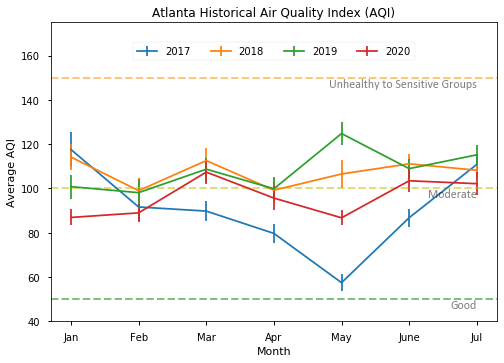

In [66]:
plt.style.use('seaborn-notebook')
atl_months["AQI"]["mean"].loc[2017].plot.line(label=2017,yerr=atl_months["AQI"]["sem"].loc[2017])
atl_months["AQI"]["mean"].loc[2018].plot.line(label=2018,yerr=atl_months["AQI"]["sem"].loc[2018])
atl_months["AQI"]["mean"].loc[2019].plot.line(label=2019,yerr=atl_months["AQI"]["sem"].loc[2019])
atl_months["AQI"]["mean"].loc[2020].plot.line(label=2020,yerr=atl_months["AQI"]["sem"].loc[2020])

# plt.text(6,399,'Hazardous', ha='right', va='top', fontsize=12, family='calibri')
# plt.axhline(y=301,color='m', alpha=.5, linestyle='--', lw=2)
# plt.text(6,301,'Very Unhealthy', ha='right', va='top', fontsize=12, family='calibri', alpha=.5)
# plt.axhline(y=200,color='r', alpha=.5, linestyle='--', lw=2)
# plt.text(6,200,'Unhealthy', ha='right', va='bottom', fontsize=12,family='calibri',alpha=.5)
plt.axhline(y=150,color='darkorange', alpha=.5, linestyle='--', lw=2)
plt.text(6,150,'Unhealthy to Sensitive Groups', ha='right', va='top', fontsize=12,family='calibri',alpha=.5)
plt.axhline(y=100,color='y', alpha=.5, linestyle='--', lw=2)
plt.text(6,100,'Moderate', ha='right', va='top', fontsize=12,family='calibri',alpha=.5)
plt.axhline(y=50,color='g', alpha=.5, linestyle='--', lw=2)
plt.text(6,50,'Good', ha='right', va='top', fontsize=12,family='calibri',alpha=.5)

plt.ylim(40,175)
plt.title("Atlanta Historical Air Quality Index (AQI)")
plt.ylabel("Average AQI")
plt.legend(loc=9, bbox_to_anchor=(.5,.95),ncol=4)
plt.savefig("../Saved_figures_alvaro/atlanta.png")

plt.show()

In [31]:
atl_months_df = atl_bins.groupby(["Year","Month"]).mean()
atl_months_df.drop(columns =["PM2.5"], inplace = True) 
atl_months_df["AQI"] = round(atl_months_df["AQI"])
atl_ave = atl_months_df

In [33]:
atl_ave.to_csv("../Saved_csv_files_alvaro/atlanta_ave_aqi.csv")